# Lab 3. Special distributions


Probability and Statistics, Spring 2016   

[CC BY-NC-SA](https://creativecommons.org/licenses/by-nc-sa/3.0/), Sakari Lukkarinen   
Helsinki Metropolia University of Applied Sciences   


## The Poisson distribution

The Poisson distribution models the number of occurences of an event in a given interval. If you keep recording the number of FaceBook messages received each day, you may notice, for example, that you receive an average number of 14 messages per day. In addition, if we assume that receiving any particular message doesn't affect the arrival times of future messages, i.e., if messages arrive independently of one another, then we can assume that the number of messages received per day obeys a Poisson distribution. Other examples that may follow a Poisson distribution are: the number of phone calls received per week, the number of alarm messages per hour from a patient monitor in hospital, or the number of students in queue in a school's cafeteria in a given quarter of hour of a day.

## Probability of events for a Poisson distribution

An event can occur 0, 1, 2, ... times in an interval. Let $\lambda$ be the expected value $X$, the number of occurences during the time period. If we measure $X$ for many time periods, the average value of $X$ will be $\lambda$. The probability of observing k events in an interval is given by the equation

$\large{P(X = k) = \frac{e^{-\lambda}\lambda^r}{r!}\quad r = 0, 1, 2, ...}$

where
- $\lambda$ is the average number of events in a given time interval
- $P(X = k)$  is the probability of observing $k$ events
- $e$ is the Euler's number (2.71828...)
- $k!$ is the factorial $k\cdot (k-1) \cdot (k-2) \cdot ... 1$.



In [156]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
from scipy.misc import factorial
%matplotlib inline

### Example

What is the probability of receiving $k$ Facebook messages per day, if the mean value per day is $\lambda = 14$?

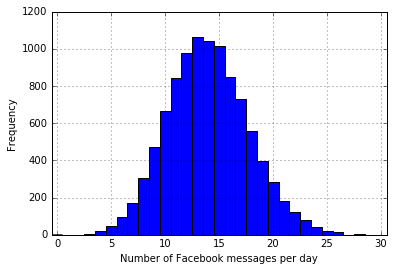

In [157]:
# Generate random numbers from Poisson distribution
lm = 14
N = 10000
x = rnd.poisson(lm, N)

# Show the frequency histogram
bins = np.arange(-0.5, 30.5)
p = plt.hist(x, bins)
plt.xlabel('Number of Facebook messages per day')
plt.ylabel('Frequency')
xl = plt.xlim(-0.5, 30.5)
plt.grid()

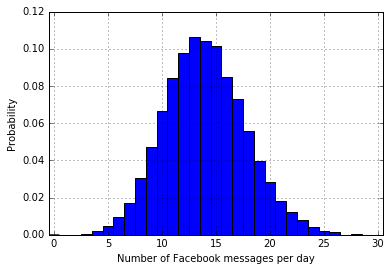

In [158]:
# Propabilities (=normed histogram)
p = plt.hist(x, bins, normed=True)
plt.xlabel('Number of Facebook messages per day')
plt.ylabel('Probability')
xl = plt.xlim(-0.5, 30.5)
plt.grid()

### Exercise 1

1. How does the probability histogram change, if the average number of messages per day is: $\lambda = [1, 3, 5, 7, 10, 20, 30]$?
2. Check by calculating the average number of messages, `np.mean(x)`, is same as $\lambda$.
3. How would you calculate the standard deviation?
4. What is the probability to receive between 10 and 15 messages per day?


## Image Shot Noise

The dominant noise in the darker parts of an image from an image sensor is typically caused by statistical quantum fluctuations, that is, variation in the number of photons sensed at a given exposure level. This noise is known as photon [shot noise](https://en.wikipedia.org/wiki/Shot_noise). The photograph below illustrates that phenomena.

<img src="https://upload.wikimedia.org/wikipedia/commons/8/87/Highimgnoise.jpg" alt="Shot noise in image" style="height:250px">

We can simulate the shot noise by using random numbers. We create a line of image sensor where we randomly add 100 000 photons.

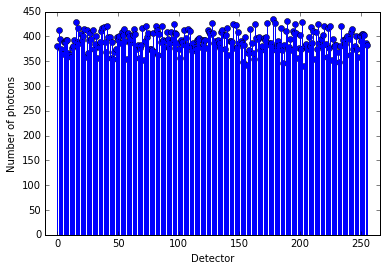

In [159]:
# Create a line of detectors
N = 256 # Number of pixels
x = np.zeros(N)

# Flux of 100 000 photons hit randomly on the detectors

# Number of photons
Np = 100*1000

# Loop while all photons detected
n = 0
while n < Np:
    # Select randomly on which detector the photon hits
    i = rnd.randint(N)
    # Increase the number of photons detected by 1
    x[i] += 1
    # Increase the loop variable
    n += 1
    
# plot how many photons hit on each detector
plt.figure()
plt.stem(x)
plt.xlabel('Detector')
plt.ylabel('Number of photons')
xl = plt.xlim(-10, 266)

### Exercise 2

1. Create a histogram of the detected photons per pixel.
2. What is the mean value of detected photons per pixel?
3. What is the standard deviation of detected photons per pixel?

## Signal-to-Noise Ratio

Signal-to-noise ratio in images can be defined how much variation there is around the mean value of the intensity over a larger area:

`SNR = np.mean(x)/np.std(x)`

In this example we can calculate the `SNR` over the whole line.

### Exercise 3

1. Calculate the Signal-to-Noise ratio for the previous example.
2. If you change the light intensity (=number of photons), how do the mean value, standard deviation and SNR value change?
3. Make a graph of the changes over several values of intensities.

## Simulation of Image Pattern

Think a case where we have only two intensity values in the image: one darker and another lighter. Below is an example of two-valued image.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/Encoder_disc_%283-Bit_binary%29.svg/284px-Encoder_disc_%283-Bit_binary%29.svg.png" alt="two-color image" style="height:250px">

How we could simulate that with our one line detector? We can create an image mask having two intensities: one for the darker and one for the lighter area. Here is an example:

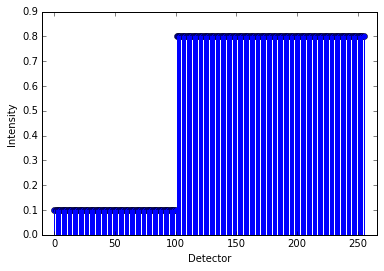

In [160]:
# Create an image mask
I1 = 0.1 # Image intensity for the darker area
I2 = 0.8 # Image intensity for the lighter area

# Create an index to all elements in mask
index = np.arange(N)

# Initialize all element to I1
mask = I1*np.ones(N)

# Change the intensity to all elements having index > 100
mask[index > 100] = I2

# Show the image mask
plt.stem(mask)
plt.xlabel('Detector')
plt.ylabel('Intensity')
xl = plt.xlim(-10, 266)


Now we can use this mask to filter the photons. We multiply the number of photons arrived on each element by these values.

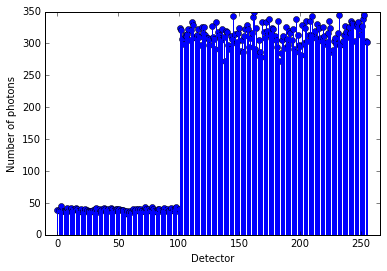

In [161]:
# See how the mask affects on the detected photons.
# Flux of 100 000 photons hit randomly on the detectors
# The mask filters out some of the photons

x = np.zeros(N)
Np = 100*1000
n = 0
while n < Np:
    i = rnd.randint(N)
    x[i] += 1
    n += 1
    
# Multiply the results with the mask
x = np.round(x*mask)
    
# plot how many photons each detector detected
plt.figure()
plt.stem(x)
plt.xlabel('Detector')
plt.ylabel('Number of photons')
xl = plt.xlim(-10, 266)

### Exercise 4

1. How does the histogram of the number of photons detected look like? Remember add enough bins in order to see the details of the histogram (for example `plt.hist(x, bins=50)`).
2. How does the histogram change, if you change the intensity values (I1 and I2) in the mask?
3. What if you change the number of photons?
4. And lastly, if you change the position, where the area changes from darker to lighter (find in the code `mask[index > 100]`?

## Studying Real Images

Next let's study a real images. [About the Camera ISO Noise Tests](http://www.the-digital-picture.com/Help/ISO-Noise.aspx) page gives examples of digital camera's capability to detect test images. Below is a photograph taken with a digital camera at ISO speed 3200. 

In [162]:
# We need image processing library, more details see: http://scikit-image.org/
import skimage.io as skio

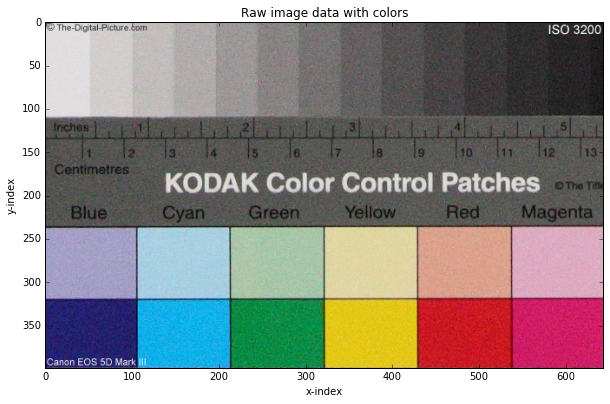

In [163]:
# The url address to find the image
fpath = 'http://media.the-digital-picture.com/Images/Other/Canon-EOS-5D-Mark-III-DSLR-Camera/Color-Blocks/'

# Filename for ISO 3200 image
fname = '5DIII-3200.jpg'
# fname = '5DIII-200.jpg' # Another ISO speed example

# Read the image
image = skio.imread(fpath + fname)

# Show it in larger figure
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.title('Raw image data with colors')
plt.xlabel('x-index')
plt.ylabel('y-index')

In [164]:
# What are the shape and the dimensions of that image?
print('shape = %s dimensions = %s' % (image.shape, image.ndim))

shape = (399, 644, 3) dimensions = 3


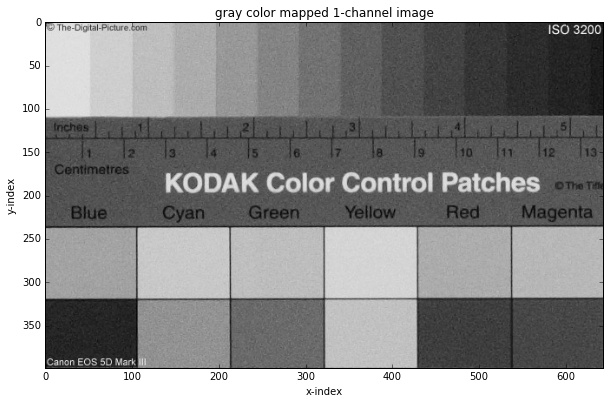

In [165]:
# Next we convert the original color image to gray-image

# Library needed, more details see: http://scikit-image.org/docs/dev/user_guide/transforming_image_data.html
import skimage.color as skcolor

# Convert to gray-scale image
grayimage = skcolor.rgb2gray(image)

# Show the results
plt.figure(figsize=(10,10))
plt.imshow(grayimage, cmap='gray')
plt.title('gray color mapped 1-channel image');
plt.xlabel('x-index')
plt.ylabel('y-index')

In [166]:
# What are the shape and dimensions of the 1-channel gray-color image?
print('shape = %s dimensions = %s' % (grayimage.shape, grayimage.ndim))

shape = (399, 644) dimensions = 2


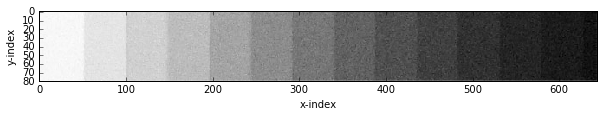

In [167]:
"""Next we show only the upper part of the image where there are is the gray-scale
test strips. The coordinates for that part are: y = 20..100 and x = 0..644.
These values are given as indexes to the original image."""

image_part = grayimage[20:100, 0:644]
plt.figure(figsize=(10,10))
plt.imshow(image_part, cmap='gray', interpolation='none', aspect='equal')
plt.xlabel('x-index')
plt.ylabel('y-index')

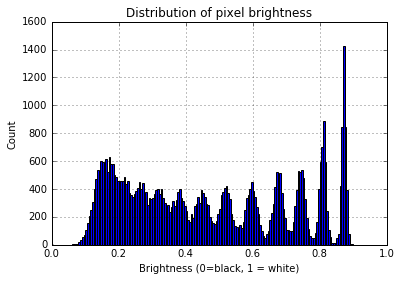

In [168]:
# Calculate the histogram of the gray values

# First flatten the 2D matrix of pixels in a row
data = image_part.flatten()

# Make a histogram, use custom bins
plt.figure()
plt.hist(data, bins=np.arange(0, 1, 0.005))
plt.xlabel('Brightness (0=black, 1 = white)')
plt.ylabel('Count')
plt.title('Distribution of pixel brightness');
plt.grid()

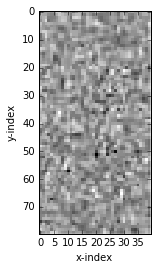

In [169]:
# Take a smaller part y = 20..100, x = pos...pos+40
pos = 580
image_part = grayimage[20:100, pos:pos+40]

# Show the image part
plt.figure()
plt.imshow(image_part, cmap='gray', interpolation='none', aspect='equal')
plt.xlabel('x-index')
plt.ylabel('y-index')

In [170]:
# Put all pixels in row of data and calculate the histogram
data = image_part.flatten()

# Print the shapes of the image part and flattened data
print('Shape of image part:', np.shape(image_part))
print('Shape of data: ', np.shape(data))

Shape of image part: (80, 40)
Shape of data:  (3200,)


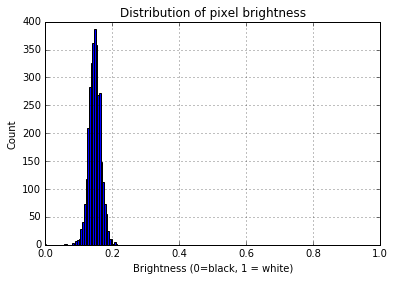

In [171]:
# Show the histogram of data
plt.figure()
plt.hist(data, bins=np.arange(0, 1, 0.005))
plt.xlabel('Brightness (0=black, 1 = white)')
plt.ylabel('Count')
plt.title('Distribution of pixel brightness')
plt.grid()

### Exercise 6

Calculate the histogram, mean and SNR value for each of the strips on the gray-scale test. Make a graph of the SNR vs. mean -`plot(mean_values, SNR_values, 'o')`. What do you observe? What mathematical function would best describe the relationship between the mean values and SNR values?